

<img src="https://img.kaikeba.com/web/hcTech/img_logo.png" alt="图片替换文本" width="500" height="150" align="bottom" />

# 深度卷积网络与计算机图像

## 目录
> - <font color=green size=4 face=雅黑> 平移不变与空间不变特性    </font>    
> - <font color=green size=4 face=雅黑> 卷积核及其作用   </font>    
> - <font color=green size=4 face=雅黑> Batch Normalization </font>      
> - <font color=green size=4 face=雅黑> Pooling and Dropout   </font>   
> - <font color=green size=4 face=雅黑> AlexNet、ResNet、DenseNet  </font>    
> - <font color=green size=4 face=雅黑> Reception方法   </font>   
> - <font color=green size=4 face=雅黑> CNN的GPU加速方法    </font>    
> - <font color=green size=4 face=雅黑> 卷积网络的可视化分析  </font>     
> - <font color=green size=4 face=雅黑> Convolutional Neural Network   </font>     
  

In [12]:
'''
第2节课学习：传统神经网络-fully connected neural networks
传统神经网络做不了图像识别
图像识别：classification, recogniction, detection, segmentation

           When a computer sees an image (takes an image as input), it will see an array of pixel values.
           The idea is that you give the computer this array of numbers and it will output numbers that describe the probability of the image being a certain class (.80 for cat, .15 for dog, .05 for bird, etc).
'''

'\n第2节课学习：传统神经网络-fully connected neural networks\n传统神经网络做不了图像识别\n图像识别：classification, recogniction, detection, segmentation\n\n           When a computer sees an image (takes an image as input), it will see an array of pixel values.\n           The idea is that you give the computer this array of numbers and it will output numbers that describe the probability of the image being a certain class (.80 for cat, .15 for dog, .05 for bird, etc).\n'

## 卷积

- <font color=green size=4 face=雅黑>  parameters sharing </font>  

### 一维卷积


<img src="https://img-blog.csdnimg.cn/20200326111118318.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="300" height="200" align="bottom" />

<img src="https://img-blog.csdnimg.cn/20200326111317780.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="300" height="400" align="bottom" />

### 二维卷积

<img src="https://img-blog.csdnimg.cn/20200303120025220.jpeg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70" alt="图片替换文本" width="400" height="600" align="bottom" />

### 三维卷积-图像
<img src="https://img-blog.csdnimg.cn/20200303120452928.gif" alt="图片替换文本" width="500" height="600" align="bottom" />

### Local invariant

 <center>
<img style="zoom:30%;"
src="Local_invariant.png">
<br>
<div style="color:black; "> </div>
</center>

In [ ]:
"""
cnn需要保持：
空间不变性/平移不变性/位置不变性：就算图像进行平移，还是可以识别出图像

维度灾难-dimension carsity
    拟合多个参数的时候，数据量太少，会导致拟合失败
    所以，同样的环境下，当需要拟合的参数每增加一个，所需要的样本需要增加一个数量级
    
    在图像识别中，需要多个窗口(weights), 也就是多个参数，将要面临巨量数据量需求
    
    Therefore, parameters sharing is needed.(参数共享)
    

Parameters sharing
facing: local(spatial) environment

在一张图像中，局部的特征可能是相似的，例如有两个同样的三角形，但是在图像不同的位置
所以，能识别两个三角形的parameters的值是一样的，所以，sharing parameters 可以减少重复的参数




术语：
window-窗口：对图像矩阵进行特征的计算，然后把值投射到filter
filter-过滤器：新的一层，有可能有多层，我的理解是神经网络的中间层（隐藏层）
strides-步长：window每次移动多少距离
padding-填充：
            zero padding：in order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs. 
            valid padding: only save the valid info, do not add extra padding in the input layers.

Strides can make the windows move quicker.

"""

### 卷积核有什么作用呢？

 #### <font color=green size=3 face=雅黑>一阶求导</font> 
 
<img src="https://img-blog.csdnimg.cn/20200326141354593.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="700" height="600" align="bottom" />

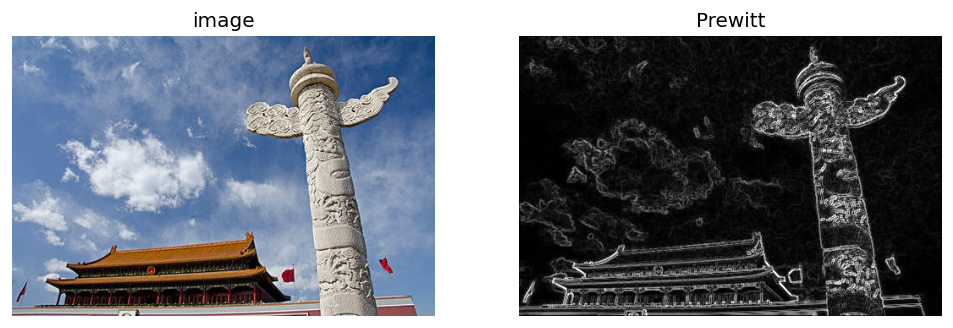

In [14]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# 读取图像-故宫
img = cv2.imread('GuGong.jpg')

# imread 读的彩色图按照BGR像素存储、转换为RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Prewitt算子
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx) #cv2.filter2D 函数是向前卷积的函数，per se， image矩阵点乘filter
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)

# 转uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# 显示结果
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(121),plt.imshow(img_RGB),plt.title('image'), plt.axis('off') #坐标轴关闭
plt.subplot(122),plt.imshow(Prewitt, cmap=plt.cm.gray ),plt.title('Prewitt'), plt.axis('off')
plt.show()

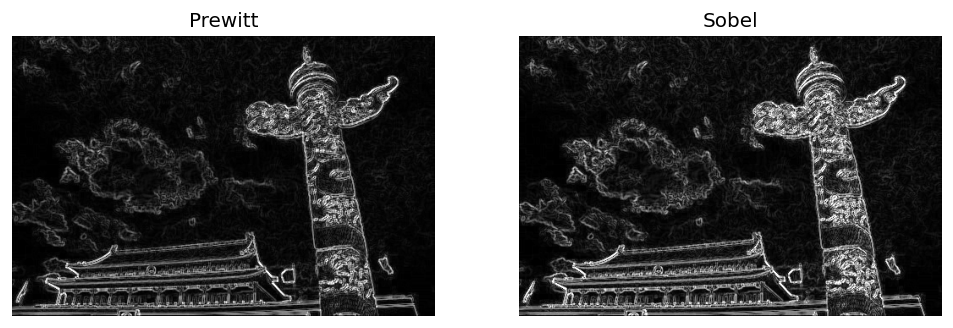

In [15]:
# Sobel算子
x = cv2.Sobel(grayImage, cv2.CV_16S, 1, 0)  # 对x求一阶导
y = cv2.Sobel(grayImage, cv2.CV_16S, 0, 1)  # 对y求一阶导
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
 
# 显示结果
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(121),plt.imshow(Prewitt, cmap=plt.cm.gray ),plt.title('Prewitt'), plt.axis('off')
plt.subplot(122),plt.imshow(Sobel, cmap=plt.cm.gray ),plt.title('Sobel'), plt.axis('off')
plt.show()

 #### <font color=green size=3 face=雅黑>二阶求导</font> 
 <img src="https://img-blog.csdnimg.cn/20200326163117463.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="700" height="600" align="bottom" />

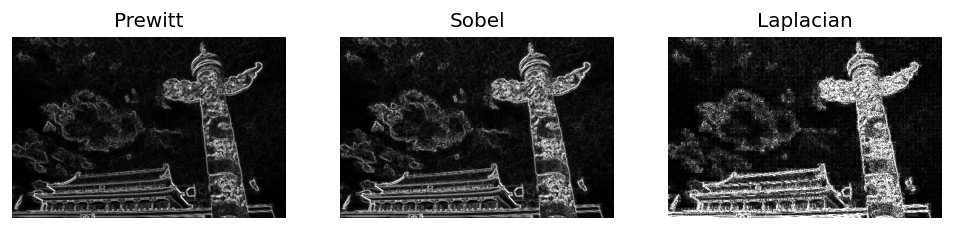

In [16]:
# 拉普拉斯算法
dst = cv2.Laplacian(grayImage, cv2.CV_16S, ksize=3)
Laplacian = cv2.convertScaleAbs(dst)
 
# 显示结果
plt.figure(figsize=(10,10),dpi=120)
#plt.subplot(141),plt.imshow(img_RGB),plt.title('image'), plt.axis('off') #坐标轴关闭
plt.subplot(131),plt.imshow(Prewitt, cmap=plt.cm.gray ),plt.title('Prewitt'), plt.axis('off')
plt.subplot(132),plt.imshow(Sobel, cmap=plt.cm.gray ),plt.title('Sobel'), plt.axis('off')
plt.subplot(133),plt.imshow(Laplacian, cmap=plt.cm.gray ),plt.title('Laplacian'), plt.axis('off')
plt.show()

#### <font color=green size=3 face=雅黑>feature maps</font> 

 <center>
<img style="zoom:50%;"
src="feature_maps.png">
<br>
<div style="color:black; "> </div>
</center>

### padding

 ####  <font color=green size=3 face=雅黑> Same Padding</font>  
    
 ![](./same_padding_no_strides_transposed.gif)


 #### <font color=green size=3 face=雅黑> Valid Padding</font>  
    
 <center>
<img style="zoom:60%;"
src="valid_padding.jpeg">
<br>
<div style="color:black; "> </div>
</center>

### strides

<center>
<img style="zoom:60%;"
src="strides.png">
<br>
<div style="color:black; "> </div>
</center>

### What is receptive field ?

<center>
<img style="zoom:50%;"
src="receptive_field.png">
<br>
<div style="color:black; "> </div>
</center>

### 卷积计算公式

 <font color=green size=3 face=雅黑>
    
> 输入图片的宽、高、通道数为$W_{in} \times H_{in} \times D_{in}$
    
> 卷积核的大小为$F\times F$、步长为$S$、Padding为$P$、卷积核的个数为$K$。   

> 根据卷积的通用公式1-1、1-2、1-3，可得输出特征图的宽、高、通道数（$W_{out} \times H_{out} \times D_{out}$）。    

$$
W_{out} = \frac{W_{in}-F+2\times P}{S}+1\tag{1-1}
$$

$$
H_{out} = \frac{H_{in}-F+2\times P}{S}+1  \tag{1-2}
$$

$$
D_{out} = K \tag{1-3}
$$



## What pooling layers do ?

<center>
<img style="zoom:60%;"
src="pool.png">
<br>
<div style="color:black; "> </div>
</center>

### max pooling and average pooling

<center>
<img style="zoom:80%;"
src="pooling.jpeg">
<br>
<div style="color:black; "> </div>
</center>

### 池化层计算公式
  
<font color=green size=3 face=雅黑>
    
> 池化（Pool）层，它可以对图片进行压缩（降采样），简化网络计算复杂度。
    
> 池化层中的核大小为$F\times F$，步长为$S$。   

> 可利用池化通用公式1-4、1-5、1-6，知道经过池化层的特征图大小。

$$
W_{out} = \frac{W_{in}-F}{S}+1  \tag{1-4}
$$

$$
H_{out} = \frac{H_{in}-F}{S}+1 \tag{1-5} \\
$$

$$
D_{out} = D_{in}  \tag{1-6}
$$



## Dropout Layer

<center>
<img style="zoom:70%;"
src="dropout.jpg">
<br>
<div style="color:black; "> </div>
</center>

In [17]:
# train:
import numpy as np
def dropout_train_step(x):
    ReLU1 = np.maximum(0,FC1)
    mask1 = (np.random.rand(*ReLU1.shape) < p) / p
    Dropout1 = ReLU1 * mask1

# test:
def dropout_test_step(x):
    ReLU1 = np.maximum(0,FC1)

## Batch Normalization

<center>
<img style="zoom:40%;"
src="bn_algorithm.png">
<br>
<div style="color:black; "> </div>
</center>

## BackBone
<center>
<img style="zoom:70%;"
src="BackBone.jpg">
<br>
<div style="color:black; "> </div>
</center>

## AlexNet
<img src="https://img-blog.csdnimg.cn/20200421154827950.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="700" height="700" align="bottom" />


In [18]:
import torch
from torch import nn, optim
import torchvision

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

class AlexNet(nn.Module):

    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 96, 11, 4), # in_channels, out_channels, kernel_size, stride, padding
            nn.ReLU(),
            nn.MaxPool2d(3, 2), # kernel_size, stride
        # 减小卷积窗⼝口，使用填充为2来使得输入与输出的高和宽一致，且增⼤输出通道数
            nn.Conv2d(96, 256, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(3, 2),
        # 连续3个卷积层，且使用更小的卷积窗口。除了最后的卷积层外，进一步 增⼤了输出通道数。
        # 前两个卷积层后不使用池化层来减小输入的⾼和宽 
            nn.Conv2d(256, 384, 3, 1, 1), 
            nn.ReLU(),
            nn.Conv2d(384, 384, 3, 1, 1), 
            nn.ReLU(),
            nn.Conv2d(384, 256, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(3, 2)
)
        # 这里全连接层的输出个数⽐ALexNet中的⼤数倍。使⽤dropout来缓解过拟合。
        self.fc = nn.Sequential(
            nn.Linear(256*5*5, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
        # 输出层，论⽂1000 
            nn.Linear(4096, 1000),
        )
def forward(self, img):
    feature = self.conv(img)
    output = self.fc(feature.view(img.shape[0], -1))
    return output

ModuleNotFoundError: No module named 'torch'

In [ ]:
net = AlexNet()
print(net)

## VGG
![](./VGG16.png)

### CNN example (An image classifier)

<center>
<img style="zoom:30%;"
src="classification.jpg ">
<br>
<div style="color:black; "> </div>
</center>

In [ ]:
import torch
import torchvision
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

# 预处理的设置
# 图片转化为 backbone网络 规定的图片大小
# 归一化是减去均值，除以方差
# 把 numpy array 转化为 tensor 的格式
my_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261])])

# 读取数据集 cifar-10 的图，有10个类，5万张图片。进行预处理。
train_dataset = torchvision.datasets.CIFAR10(root='./',train=True,transform=my_tf,download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./',train=False,transform=my_tf,download=True)

# 调用预训练模型vgg16
my_vgg = torchvision.models.vgg16(pretrained=True)
# 固定网络框架全连接层之前的参数
for param in my_vgg.parameters():
    param.requires_grad=False
# 将vgg最后一层输出的类别数，改为cifar-10的类别数（10）
in_f = my_vgg.classifier[6].in_features
my_vgg.classifier[6] = nn.Linear(in_f,10)

# 超参数设置
learn_rate = 0.001
num_epoches = 10
# 多分类损失函数，使用默认值
criterion = nn.CrossEntropyLoss()  
# 梯度下降，求解模型最后一层参数
optimizer = optim.SGD(my_vgg.classifier[6].parameters(),lr=learn_rate,momentum=0.9)
# 判断使用CPU还是GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# 图片分批次送入内存（32张图片,batch_size），进行计算。
train_dataloader = DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset)

# 训练阶段
my_vgg.to(device)
my_vgg.train()
for epoch in range(num_epoches):
    print(f"epoch: {epoch+1}")
    for idx,(img,label)in enumerate(train_dataloader):
        images = img.to(device)
        labels = label.to(device)
        output = my_vgg(images)
        loss = criterion(output,labels)
        loss.backward() # 损失反向传播
        optimizer.step() # 更新梯度
        optimizer.zero_grad() # 梯度清零
        if idx%100==0:
            print(f"current loss = {loss.item()}")

# 测试阶段
my_vgg.to(device)
my_vgg.eval() # 把训练好的模型的参数冻结
total,correct = 0 , 0
for img,label in test_dataloader:
    images = img.to(device)
    labels = label.to(device)
    output = my_vgg(images)
    _,idx = torch.max(output.data,1) # 输出最大值的位置
    total += labels.size(0) # 全部图片
    correct +=(idx==labels).sum() # 正确的图片

print(f"accuracy:{100.*correct/total}")                  

## GoogLeNet
### Inception Module
<center>
<img style="zoom:50%;"
src="inception.jpg ">
<br>
<div style="color:black; "> </div>
</center>

## ResNet
### Bottleneck
<center>
<img style="zoom:50%;"
src="bottleneck.jpg ">
<br>
<div style="color:black; "></div>
</center>

### ResNet

<center>
<img style="zoom:50%;"
src="ResNet_Structure.jpg ">
<br>
<div style="color:black; "> </div>
</center>

### FLOPs
<font color=green size=3 face=雅黑>
    
> FLOPs(floating-point operations)指的是浮点运算次数，FLOPs可以衡量框架的复杂度。框架的复杂度与权重和bias有关。      
    输入图像的高、宽、通道数用 $H_{in}$、 $W_{in}$、$D_{in}$；    
    输出的特征图的高、宽、通道数用$H_{out}$、 $W_{out}$、$ D_{out}$表示。    
    卷积核的宽和高用$F_w$、$F_h$表示。     
    $N_p$ 表示特征图一个点的计算量。
    
$$
N_p = (F_w\times F_h\times D_{in}) \times D_{out} + D_{out} \tag{1-7}
$$

    
$$
FLOPs: N_P \times H_{out} \times W_{out} \tag{1-8}
$$

    


> 对于全连接层，输入的特征图会拉伸为$1*N_{in}$的向量，输出的向量维度为$1*N_{out}$。
    
$$
FLOPs:N_{in} \times N_{out} + N_{out} \tag{1-9}
$$
 
    
 <center>
<img style="zoom:40%;"
src="vgg_flops.jpg ">
<br>
<div style="color:black; ">图1-10</div>
</center>
    
> 也可以使用工具包[Flops counter](https://github.com/sovrasov/flops-counter.pytorch)在pytorch中计算网络的复杂度，根据网址的介绍安装工具包。
    
     
> 例子
    
```python
import torch
import torchvision.models as models # 导入网络框架
import ptflops # 导入计算FLOPs的包
ptflops.get_model_complexity_info(models.vgg16(), (3,224,224))
# ('15.5 GMac', '138.36 M')
```
    


## DenseNet

<center>
<img style="zoom:50%;"
src="densenet.jpg ">
<br>
<div style="color:black; "> </div>
</center>

## GPU加速

[GPU计算加速](https://zhuanlan.zhihu.com/p/76297133)         
[Pytorch 如何高效使用GPU](http://www.feiguyunai.com/index.php/2019/04/30/python-ml-25-pytorch-gpu/)

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)

## 卷积网络的可视化分析

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# 读取图像
img = cv2.imread('故宫.jpg')

# imread 读的彩色图按照BGR像素存储、转换为RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Normalise
grayImage = grayImage.astype("float32")/255

plt.imshow(grayImage, cmap='gray')
plt.show()

In [ ]:


filter_vals = np.array([
  [-1, -1, 1, 1],
  [-1, -1, 1, 1],
  [-1, -1, 1, 1],
  [-1, -1, 1, 1]
])

print('Filter shape: ', filter_vals.shape)

# Defining the Filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# Check the Filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        color='white' if filters[i][x][y]<0 else 'black')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        # initializes the weights of the convolutional layer
        self.conv.weight = torch.nn.Parameter(weight)
        # define a pooling layer
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)

        # applies pooling layer
        pooled_x = self.pool(activated_x)

        # returns all layers
        return conv_x, activated_x, pooled_x
    
    # instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

In [ ]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))

    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(grayImage).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer, pool_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

# visualize the output of activate layer
viz_layer(activated_layer)

# visualize the output of a pool layer
viz_layer(pool_layer)